# What are we doing here

A group of mild mannered and mild pocketed friends are interested in funding a variety of kickstarters.
We wish to help entrepreneurs of all passions succeed, however we are wary to 

In [1]:
# Standard modules
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.tools as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

In [2]:
df_dirty = pd.read_csv(r"Data/Kickstarter_2.csv")
df = df_dirty.dropna()

In [3]:
df.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
print(df['state'].value_counts())
#Breakdown of campaigns
print(df['category'].value_counts())

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64
Product Design     22310
Documentary        16138
Tabletop Games     14178
Music              13340
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64


In [5]:
fail_df = df[df['state']=='failed']
pass_df = df[df['state']=='successful']

## Exploratory Analysis

### Pie Chart Breakdowns

In [7]:
def pie_bake(feature, title):
    campaign_stats = round(df[feature].value_counts() / len(df[feature]) *100,2)
    print(title," as a %:\n", campaign_stats)

    labels = list(campaign_stats.index)
    values = list(campaign_stats.values)

    viz1 = go.Pie(labels=labels, values=values, marker=dict(colors=['blue']))

    layout = go.Layout(title=title, legend=dict(orientation='h'))

    fig=go.Figure(data=[viz1], layout=layout)
    iplot(fig)

In [8]:
pie_bake('state','Campaign Success Rates')

Campaign Success Rates  as a %:
 failed        52.72
successful    35.71
canceled      10.34
live           0.75
suspended      0.49
Name: state, dtype: float64


In [9]:
pie_bake('currency','Currency Breakdown')

Currency Breakdown  as a %:
 USD    78.06
GBP     8.98
EUR     4.59
CAD     3.94
AUD     2.09
SEK     0.47
MXN     0.47
NZD     0.39
DKK     0.30
CHF     0.20
NOK     0.19
HKD     0.16
SGD     0.15
JPY     0.01
Name: currency, dtype: float64


In [10]:
pie_bake('main_category',"Breakdown of Main Categories")

Breakdown of Main Categories  as a %:
 Film & Video    16.73
Music           13.21
Publishing      10.50
Games            9.40
Technology       8.69
Design           8.02
Art              7.51
Food             6.56
Fashion          6.09
Theater          2.91
Comics           2.89
Photography      2.88
Crafts           2.35
Journalism       1.27
Dance            1.00
Name: main_category, dtype: float64


## Histograms

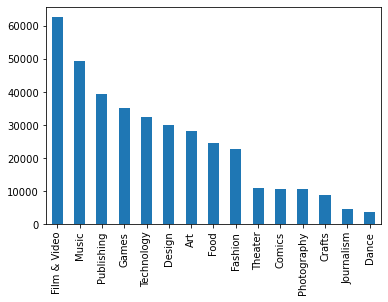

In [11]:
# Another breakdown of our Main Category feature
df['main_category'].value_counts().plot.bar()
plt.show()

In [12]:
main_cat = df['main_category'].value_counts()
main_pass = df[df['state']=='successful']['main_category'].value_counts()
main_fail = df[df['state']=='failed']['main_category'].value_counts()


plot0 = go.Bar(
    x=main_fail.index,
    y=main_fail.values,
    name="Failed Campaigns"
)

plot1 = go.Bar(
    x=main_pass.index,
    y=main_pass.values,
    name="Successful Campaigns"
)

plot2 = go.Bar(
    x=main_cat.index,
    y=main_cat.values,
    name="Distribution of All Categories"
)


fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Failed','Successful', "General Category's"))


fig.append_trace(plot0, 1, 1)
fig.append_trace(plot1, 1, 2)
fig.append_trace(plot2, 2, 1)

fig['layout'].update(showlegend=True, title="Campaign Distributions by Main Category",bargap=0.5)
iplot(fig)

C:\Users\marce\anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## Data Preparation

In [13]:
df = df[(df['state']=='failed')|(df['state']=='successful')].copy()

In [14]:
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])

df['campaign_length'] = df['deadline'].subtract(df['launched'])
df['campaign_length'] = df['campaign_length'].astype('timedelta64[D]')

df = df.drop(['ID', 'name','usd pledged','usd_pledged_real','backers',
             'pledged','deadline','launched'],1)

### Encoding

In [15]:
df['state'] = df['state'].map({
    'failed':0,
    'successful':1
})

df = pd.get_dummies(df, columns=['category', 'main_category', 'currency','country'])

df.rename(columns={"main_category_Film & Video" : "main_category_Film"}, inplace=True)
# This just gets rid of ugly characters

In [16]:
df

,goal,state,usd_goal_real,campaign_length,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000.0,0,1533.95,58.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,0,30000.00,59.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,0,45000.00,44.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,0,5000.00,29.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0,1,50000.00,34.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378654,6500.0,0,6500.00,29.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
378657,1500.0,0,1500.00,26.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
378658,15000.0,0,15000.00,45.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
378659,15000.0,0,15000.00,30.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

#bag_of

In [18]:
#df['state'].head()

## Modeling

In [19]:
y = df['state']
df = df.drop('state',1)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    df, y, test_size=0.3, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(232023, 213) (232023,)
(99439, 213) (99439,)


### LogReg

In [21]:
from sklearn.metrics import classification_report

In [22]:
def report(model):
    y_pred = model.predict(x_test)
    return print(classification_report(y_test, y_pred))

In [23]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

acc_log = round(logreg.score(x_test, y_test) * 100, 2)
print(acc_log)

report(logreg)

59.62
              precision    recall  f1-score   support

           0       0.60      1.00      0.75     59284
           1       0.00      0.00      0.00     40155

    accuracy                           0.60     99439
   macro avg       0.30      0.50      0.37     99439
weighted avg       0.36      0.60      0.45     99439



C:\Users\marce\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [24]:
# coefficients

co_df = pd.DataFrame(df.columns.delete(0))
co_df.columns = ['Feature']
co_df['Correlation'] = pd.Series(logreg.coef_[0])

co_df.sort_values(by="Correlation", ascending=False)

,Feature,Correlation
172,main_category_Photography,0.000047
139,category_Taxidermy,0.000040
176,currency_AUD,0.000028
132,category_Small Batch,0.000020
144,category_Thrillers,0.000020
...,...,...
190,country_AT,-0.000043
175,main_category_Theater,-0.000043
167,main_category_Film,-0.000045
174,main_category_Technology,-0.000055


In [25]:
# KNN
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

acc_knn=round(knn.score(x_test, y_test) * 100,2)
acc_knn

62.41

In [26]:
report(knn)

              precision    recall  f1-score   support

           0       0.67      0.72      0.70     59284
           1       0.54      0.48      0.51     40155

    accuracy                           0.62     99439
   macro avg       0.61      0.60      0.60     99439
weighted avg       0.62      0.62      0.62     99439



In [27]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
acc_decision_tree

63.48

In [28]:
report(decision_tree)

              precision    recall  f1-score   support

           0       0.68      0.74      0.71     59284
           1       0.56      0.47      0.51     40155

    accuracy                           0.63     99439
   macro avg       0.62      0.61      0.61     99439
weighted avg       0.63      0.63      0.63     99439



In [29]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)
acc_random_forest

65.04

In [30]:
report(random_forest)

              precision    recall  f1-score   support

           0       0.69      0.75      0.72     59284
           1       0.58      0.50      0.54     40155

    accuracy                           0.65     99439
   macro avg       0.63      0.63      0.63     99439
weighted avg       0.64      0.65      0.65     99439



In [33]:
# Linear Support Vector Classification

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

acc_linear_svc = round(linear_svc.score(x_test, y_test) * 100, 2)
acc_linear_svc

C:\Users\marce\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



52.42

In [34]:
report(linear_svc)

              precision    recall  f1-score   support

           0       0.76      0.30      0.43     59284
           1       0.45      0.86      0.59     40155

    accuracy                           0.52     99439
   macro avg       0.61      0.58      0.51     99439
weighted avg       0.63      0.52      0.49     99439



In [38]:
model_map = pd.DataFrame({
    'Model':['Logistic Regression','KNN',
            'Decision Tree','Random Forest',
            'Linear SVC'],
    'Score':[acc_log, acc_knn,
            acc_decision_tree, acc_random_forest,
             acc_linear_svc]
})

model_map.sort_values(by='Score')

,Model,Score
4,Linear SVC,52.42
0,Logistic Regression,59.62
1,KNN,62.41
2,Decision Tree,63.48
3,Random Forest,65.04


### maps